In [72]:
import pandas as pd

df=pd.read_excel("TunerMotor_Classified.xlsx").drop("Unnamed: 0",axis=1)
df.head()

,product-img-link href,cleanDesc,Category,Is_Leasable,price,short-description
0,https://www.turnermotorsport.com/p-587351-univ...,"Universal Exhaust Pipe Reducer - 3"" OD To 60mm ID",Pipes and Connectors,False,$15.96,Connect your differently sized exhaust pipes q...
1,https://www.turnermotorsport.com/p-587345-stai...,Stainless Steel Weld-In Oxygen Sensor Bung - M...,Electronics,True,$2.36,Finish your custom exhaust with this T304 stai...
2,https://www.turnermotorsport.com/p-587338-univ...,"Universal Exhaust Clamp - 2.75"" (70mm)",Exhaust,False,$14.21,This corrosion-resistant exhaust clamp is made...
3,https://www.turnermotorsport.com/p-587334-univ...,Universal Exhaust Clamp - 64.5mm,Exhaust,False,$10.46,This corrosion-resistant exhaust clamp is made...
4,https://www.turnermotorsport.com/p-587336-univ...,"Universal Exhaust Clamp - 3.0"" (76.2mm)",Exhaust,False,$18.71,This corrosion-resistant exhaust clamp is made...


In [83]:
import re
import nltk
nltk.download('stopwords')
import string
string.punctuation
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
import torch
import numpy as np

stopword = nltk.corpus.stopwords.words('english')

def to_lower_case(text):
    return str(text).lower()

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

def tokenize(text):
    split=re.split("\W+",text) 
    return split

def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text


def sen_to_vec(sentence):
    tokens=tokenizer.tokenize(sentence)
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    T=700
    padded_tokens=tokens +['[PAD]' for _ in range(T-len(tokens))]
    attn_mask=[ 1 if token != '[PAD]' else 0 for token in padded_tokens  ]
    seg_ids=[0 for _ in range(len(padded_tokens))]
    sent_ids=tokenizer.convert_tokens_to_ids(padded_tokens)
    return np.array(sent_ids)

def sen_to_vec_cat(sentence):
    tokens=tokenizer.tokenize(sentence)
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    T=5
    padded_tokens=tokens +['[PAD]' for _ in range(T-len(tokens))]
    attn_mask=[ 1 if token != '[PAD]' else 0 for token in padded_tokens  ]
    seg_ids=[0 for _ in range(len(padded_tokens))]
    sent_ids=tokenizer.convert_tokens_to_ids(padded_tokens)
    return np.array(sent_ids)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AyanSau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def adjust_price(string):
    return abs(float(string.replace(",","")[1:]))

df["price"]=df["price"].apply(adjust_price)
df.head()

C:\Users\AyanSau\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AyanSau\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


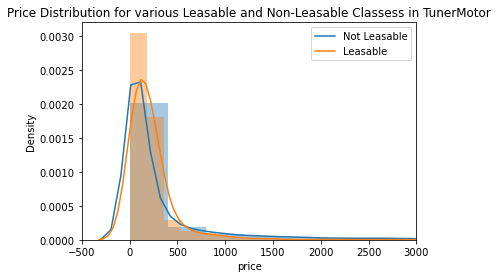

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.distplot(df[df["Is_Leasable"]==False]["price"],ax=ax)
sns.distplot(df[df["Is_Leasable"]==True]["price"],ax=ax)
ax.set_xlim(-500,3000)
plt.title("Price Distribution for various Leasable and Non-Leasable Classess in TunerMotor")
plt.legend(labels=['Not Leasable', 'Leasable'])
plt.show()

In [76]:
df["Is_Leasable"]=df["Is_Leasable"].apply(lambda x:0 if x==False else 1)
df.head()

,product-img-link href,cleanDesc,Category,Is_Leasable,price,short-description
0,https://www.turnermotorsport.com/p-587351-univ...,"Universal Exhaust Pipe Reducer - 3"" OD To 60mm ID",Pipes and Connectors,0,15.96,Connect your differently sized exhaust pipes q...
1,https://www.turnermotorsport.com/p-587345-stai...,Stainless Steel Weld-In Oxygen Sensor Bung - M...,Electronics,1,2.36,Finish your custom exhaust with this T304 stai...
2,https://www.turnermotorsport.com/p-587338-univ...,"Universal Exhaust Clamp - 2.75"" (70mm)",Exhaust,0,14.21,This corrosion-resistant exhaust clamp is made...
3,https://www.turnermotorsport.com/p-587334-univ...,Universal Exhaust Clamp - 64.5mm,Exhaust,0,10.46,This corrosion-resistant exhaust clamp is made...
4,https://www.turnermotorsport.com/p-587336-univ...,"Universal Exhaust Clamp - 3.0"" (76.2mm)",Exhaust,0,18.71,This corrosion-resistant exhaust clamp is made...


In [77]:
df["Is_Leasable"].corr(df["price"])

-0.02865780961788871

In [78]:
df["cleanDesc"]=df["cleanDesc"].apply(to_lower_case)
df["cleanDesc"]=df["cleanDesc"].apply(remove_punctuation)
df["cleanDesc"]=df["cleanDesc"].apply(tokenize)
df["cleanDesc"]=df["cleanDesc"].apply(remove_stopwords)
df["cleanDesc"]=df["cleanDesc"].apply(lambda x:" ".join(x))

df["Category"]=df["Category"].apply(to_lower_case)
df["Category"]=df["Category"].apply(remove_punctuation)
df["Category"]=df["Category"].apply(tokenize)
df["Category"]=df["Category"].apply(remove_stopwords)
df["Category"]=df["Category"].apply(lambda x:" ".join(x))

df["short-description"]=df["short-description"].apply(to_lower_case)
df["short-description"]=df["short-description"].apply(remove_punctuation)
df["short-description"]=df["short-description"].apply(tokenize)
df["short-description"]=df["short-description"].apply(remove_stopwords)
df["short-description"]=df["short-description"].apply(lambda x:" ".join(x))

In [79]:
df.head()

,product-img-link href,cleanDesc,Category,Is_Leasable,price,short-description
0,https://www.turnermotorsport.com/p-587351-univ...,universal exhaust pipe reducer 3 od 60mm id,pipes connectors,0,15.96,connect differently sized exhaust pipes quick ...
1,https://www.turnermotorsport.com/p-587345-stai...,stainless steel weldin oxygen sensor bung m18x...,electronics,1,2.36,finish custom exhaust t304 stainless steel wel...
2,https://www.turnermotorsport.com/p-587338-univ...,universal exhaust clamp 275 70mm,exhaust,0,14.21,corrosionresistant exhaust clamp made 430 stai...
3,https://www.turnermotorsport.com/p-587334-univ...,universal exhaust clamp 645mm,exhaust,0,10.46,corrosionresistant exhaust clamp made 430 stai...
4,https://www.turnermotorsport.com/p-587336-univ...,universal exhaust clamp 30 762mm,exhaust,0,18.71,corrosionresistant exhaust clamp made 430 stai...


In [81]:
# T value
print(max(df["cleanDesc"].apply(lambda x:len(x.split())).tolist()))

df["cleanDesc"]=df["cleanDesc"].apply(sen_to_vec)

16


In [82]:
# T value
print(max(df["Category"].apply(lambda x:len(x.split())).tolist()))

df["Category"]=df["Category"].apply(sen_to_vec_cat)

3


In [85]:
# T value
print(max(df["short-description"].apply(lambda x:len(x.split())).tolist()))

df["short-description"]=df["short-description"].apply(sen_to_vec)

700


In [86]:
df.head()

,product-img-link href,cleanDesc,Category,Is_Leasable,price,short-description
0,https://www.turnermotorsport.com/p-587351-univ...,"[101, 5415, 15095, 8667, 5547, 2099, 1017, 105...","[101, 12432, 19400, 2015, 102]",0,15.96,"[101, 7532, 11543, 7451, 15095, 12432, 4248, 3..."
1,https://www.turnermotorsport.com/p-587345-stai...,"[101, 18676, 3886, 2057, 6392, 2378, 7722, 136...","[101, 8139, 102, 0, 0]",1,2.36,"[101, 3926, 7661, 15095, 1056, 14142, 2549, 18..."
2,https://www.turnermotorsport.com/p-587338-univ...,"[101, 5415, 15095, 18856, 16613, 17528, 3963, ...","[101, 15095, 102, 0, 0]",0,14.21,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."
3,https://www.turnermotorsport.com/p-587334-univ...,"[101, 5415, 15095, 18856, 16613, 4185, 2629, 7...","[101, 15095, 102, 0, 0]",0,10.46,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."
4,https://www.turnermotorsport.com/p-587336-univ...,"[101, 5415, 15095, 18856, 16613, 2382, 6146, 2...","[101, 15095, 102, 0, 0]",0,18.71,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."


In [87]:
df["Is_Leasable"]=df["Is_Leasable"].apply(lambda x:0 if x==False else 1)
df.head()

,product-img-link href,cleanDesc,Category,Is_Leasable,price,short-description
0,https://www.turnermotorsport.com/p-587351-univ...,"[101, 5415, 15095, 8667, 5547, 2099, 1017, 105...","[101, 12432, 19400, 2015, 102]",0,15.96,"[101, 7532, 11543, 7451, 15095, 12432, 4248, 3..."
1,https://www.turnermotorsport.com/p-587345-stai...,"[101, 18676, 3886, 2057, 6392, 2378, 7722, 136...","[101, 8139, 102, 0, 0]",1,2.36,"[101, 3926, 7661, 15095, 1056, 14142, 2549, 18..."
2,https://www.turnermotorsport.com/p-587338-univ...,"[101, 5415, 15095, 18856, 16613, 17528, 3963, ...","[101, 15095, 102, 0, 0]",0,14.21,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."
3,https://www.turnermotorsport.com/p-587334-univ...,"[101, 5415, 15095, 18856, 16613, 4185, 2629, 7...","[101, 15095, 102, 0, 0]",0,10.46,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."
4,https://www.turnermotorsport.com/p-587336-univ...,"[101, 5415, 15095, 18856, 16613, 2382, 6146, 2...","[101, 15095, 102, 0, 0]",0,18.71,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."


In [88]:
df_for_model=df.drop("product-img-link href",axis=1)
df_for_model.head()

,cleanDesc,Category,Is_Leasable,price,short-description
0,"[101, 5415, 15095, 8667, 5547, 2099, 1017, 105...","[101, 12432, 19400, 2015, 102]",0,15.96,"[101, 7532, 11543, 7451, 15095, 12432, 4248, 3..."
1,"[101, 18676, 3886, 2057, 6392, 2378, 7722, 136...","[101, 8139, 102, 0, 0]",1,2.36,"[101, 3926, 7661, 15095, 1056, 14142, 2549, 18..."
2,"[101, 5415, 15095, 18856, 16613, 17528, 3963, ...","[101, 15095, 102, 0, 0]",0,14.21,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."
3,"[101, 5415, 15095, 18856, 16613, 4185, 2629, 7...","[101, 15095, 102, 0, 0]",0,10.46,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."
4,"[101, 5415, 15095, 18856, 16613, 2382, 6146, 2...","[101, 15095, 102, 0, 0]",0,18.71,"[101, 24625, 6072, 23137, 2102, 15095, 18856, ..."
